In [37]:
!pip install nltk

In [38]:
import nltk

In [39]:
from nltk import pos_tag # Part-of-Speech (POS) tagging
from nltk.stem import WordNetLemmatizer # lemmatize a word
from nltk.stem.porter import PorterStemmer # Information Retrieval
from nltk.tokenize import word_tokenize # splits sentence into words 
from nltk.tokenize import WhitespaceTokenizer # splits on and discards only whitespace characters
from nltk.corpus import wordnet # large lexical database of English words
from nltk.sentiment.vader import SentimentIntensityAnalyzer # sentiment analyzer

nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('vader_lexicon')

[nltk_data] Error loading stopwords: <urlopen error [WinError 10054]
[nltk_data]     An existing connection was forcibly closed by the
[nltk_data]     remote host>
[nltk_data] Error loading averaged_perceptron_tagger: <urlopen error
[nltk_data]     [WinError 10054] An existing connection was forcibly
[nltk_data]     closed by the remote host>
[nltk_data] Error loading wordnet: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading omw-1.4: <urlopen error [WinError 10054] An
[nltk_data]     existing connection was forcibly closed by the remote
[nltk_data]     host>
[nltk_data] Error loading vader_lexicon: <urlopen error [WinError
[nltk_data]     10054] An existing connection was forcibly closed by
[nltk_data]     the remote host>


False

In [40]:
import numpy as np # for array, linear algebra
import pandas as pd # for data processing
import matplotlib.pyplot as plt # to crreate stat and visualize data
import matplotlib as mpl  # to visualize data
import seaborn as sns # to visualize data
import matplotlib.colors as mcolors # to visualize colors
import string # collection of alphabets, words or other characters
import re # regular expression support
import gensim # representing documents as semantic vectors

In [41]:
from matplotlib.cm import ScalarMappable # for colormap 
from matplotlib.lines import Line2D # line segment in (x,y) coordinate space
from mpl_toolkits.axes_grid1.inset_locator import inset_axes # give our figure extra personalities
from textwrap import wrap # modifying the behavior of functions. 
from wordcloud import WordCloud # to visualize text
from sklearn.feature_extraction.text import TfidfVectorizer # converts a collection of raw documents into a matrix
from gensim.test.utils import common_texts # training corpus
from gensim.models.doc2vec import Doc2Vec, TaggedDocument #  representing documents as a vector
from PIL import Image # import image

In [42]:
df = pd.read_excel('E:/OLD LAPTOP Data - Lenovo/Downloads/NLP/trainingfeedback.xlsx')
df.head()

,Feedback,Comments,Suggestions,Ideas,Rating
0,It gives me a lot of knowledge that I can use ...,NaN,Love the training,TMU Course was damn helpful,3
1,clearness and conciseness of the course how it...,NaN,Thank you boss,all good,5
2,"after taking this course, I choose to be ""Kid""...",None,All good,no comments,2


In [43]:
df.isna().sum()

Feedback       0
Comments       2
Suggestions    0
Ideas          0
Rating         0
dtype: int64

In [44]:
df.duplicated().sum()

0

In [45]:
# upload stopwords txt

gist_file = open("gist_stopwords.txt", "r")
content = gist_file.read()
stopwords = content.split(",")
gist_file.close()

In [46]:
# return the wordnet object value

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

def clean_text(text):
    # remove \t
    text = text.replace('\t', '')
    # lower text
    text = text.lower()
    # tokenize text and remove puncutation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    # remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    # remove stop words
    text = [x for x in text if x not in stopwords]
    # remove empty tokens
    text = [t for t in text if len(t) > 0]
    # pos tag text
    pos_tags = pos_tag(text)
    # lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    # remove words with only one letter
    text = [t for t in text if len(t) > 1]
    # join all
    text = ' '.join(text)
    return(text)

In [47]:
# Apply clean_text function

df['Clean_Feedback'] = df['Feedback'].apply(lambda x: clean_text(x))
df.head()

,Feedback,Comments,Suggestions,Ideas,Rating,Clean_Feedback
0,It gives me a lot of knowledge that I can use ...,NaN,Love the training,TMU Course was damn helpful,3,lot knowledge journey
1,clearness and conciseness of the course how it...,NaN,Thank you boss,all good,5,clearness conciseness communicate
2,"after taking this course, I choose to be ""Kid""...",None,All good,no comments,2,choose kid


In [48]:
# add sentiment analysis

sid = SentimentIntensityAnalyzer()

df['Sentiments'] = df['Feedback'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['Sentiments'], axis=1), df['Sentiments'].apply(pd.Series)], axis=1)
df.head()

,Feedback,Comments,Suggestions,Ideas,Rating,Clean_Feedback,neg,neu,pos,compound
0,It gives me a lot of knowledge that I can use ...,NaN,Love the training,TMU Course was damn helpful,3,lot knowledge journey,0.0,1.000,0.000,0.0000
1,clearness and conciseness of the course how it...,NaN,Thank you boss,all good,5,clearness conciseness communicate,0.0,0.682,0.318,0.6808
2,"after taking this course, I choose to be ""Kid""...",None,All good,no comments,2,choose kid,0.0,1.000,0.000,0.0000


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Feedback        3 non-null      object 
 1   Comments        1 non-null      object 
 2   Suggestions     3 non-null      object 
 3   Ideas           3 non-null      object 
 4   Rating          3 non-null      int64  
 5   Clean_Feedback  3 non-null      object 
 6   neg             3 non-null      float64
 7   neu             3 non-null      float64
 8   pos             3 non-null      float64
 9   compound        3 non-null      float64
dtypes: float64(4), int64(1), object(5)
memory usage: 372.0+ bytes


In [50]:
# create doc2vec vector columns
documents = [TaggedDocument(doc, [i]) for i, doc in enumerate(df['Clean_Feedback'].apply(lambda x: x.split(' ')))]

# train a Doc2Vec model with our text data
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

# transform each document into a vector data
doc2vec_df = df['Clean_Feedback'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ['doc2vec_vector_' + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)
df.head()

,Feedback,Comments,Suggestions,Ideas,Rating,Clean_Feedback,neg,neu,pos,compound,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,It gives me a lot of knowledge that I can use ...,NaN,Love the training,TMU Course was damn helpful,3,lot knowledge journey,0.0,1.000,0.000,0.0000,-0.061128,-0.053744,0.031063,0.023474,0.001938
1,clearness and conciseness of the course how it...,NaN,Thank you boss,all good,5,clearness conciseness communicate,0.0,0.682,0.318,0.6808,-0.030732,-0.049080,0.061899,0.084440,-0.031318
2,"after taking this course, I choose to be ""Kid""...",None,All good,no comments,2,choose kid,0.0,1.000,0.000,0.0000,0.033468,0.080470,0.041713,-0.009721,0.042434


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Feedback          3 non-null      object 
 1   Comments          1 non-null      object 
 2   Suggestions       3 non-null      object 
 3   Ideas             3 non-null      object 
 4   Rating            3 non-null      int64  
 5   Clean_Feedback    3 non-null      object 
 6   neg               3 non-null      float64
 7   neu               3 non-null      float64
 8   pos               3 non-null      float64
 9   compound          3 non-null      float64
 10  doc2vec_vector_0  3 non-null      float32
 11  doc2vec_vector_1  3 non-null      float32
 12  doc2vec_vector_2  3 non-null      float32
 13  doc2vec_vector_3  3 non-null      float32
 14  doc2vec_vector_4  3 non-null      float32
dtypes: float32(5), float64(4), int64(1), object(5)
memory usage: 432.0+ bytes


In [52]:
# create the positive and negative label column

df['posneg'] = df['Rating'].apply(lambda x: 0 if x < 3 else 1)

In [53]:
df['posneg']

0    1
1    1
2    0
Name: posneg, dtype: int64

In [54]:
# Calculate Positive and Negative Review

train_pos = df[ df['posneg'] == 1]
train_pos = train_pos['Clean_Feedback']
train_neg = df[ df['posneg'] == 0]
train_neg = train_neg['Clean_Feedback']

In [55]:
train_pos

0                lot knowledge journey
1    clearness conciseness communicate
Name: Clean_Feedback, dtype: object

In [56]:
train_neg

2    choose kid
Name: Clean_Feedback, dtype: object

In [57]:
# Generate WordCloud Function
# using mask/shape = cloud

def wordCloud_generator(data, color, color_map):
    
    wave_mask = np.array(Image.open('wordcloud.png'))
    
    wordcloud = WordCloud(width = 1000, height = 1000,
                          background_color =color,
                          min_font_size = 12,
                          colormap= color_map,
                          mask = wave_mask
                         ).generate(' '.join(data.values))
    
    # plot the WordCloud image                        
    plt.figure(figsize = (10, 10), facecolor = None) 
    plt.imshow(wordcloud, interpolation='bilinear') 
    plt.axis('off')
    
    plt.show() 

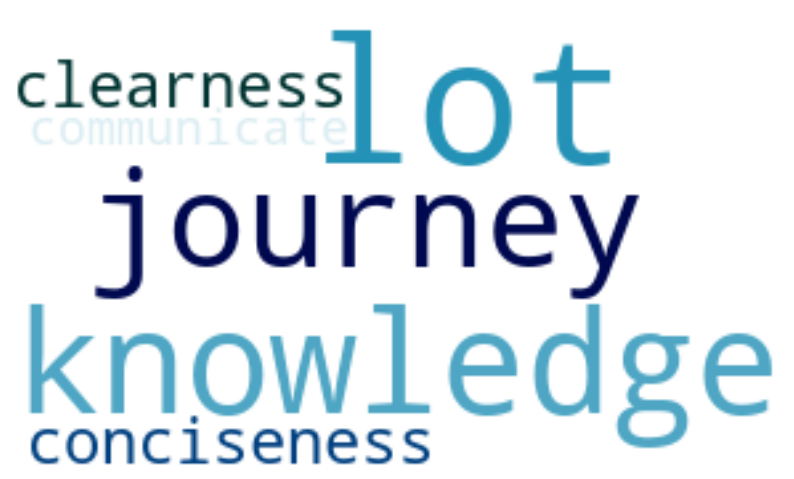

In [58]:
# WordCloud for Positive Review

wordCloud_generator(train_pos, 'white', 'ocean')

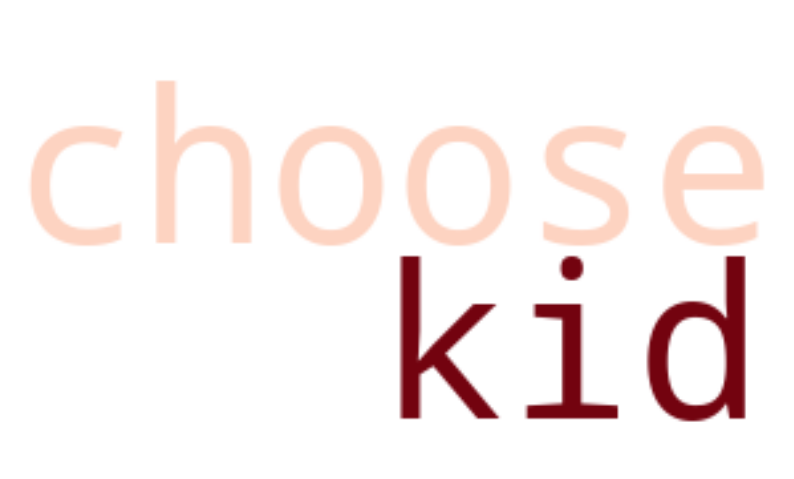

In [59]:
# Wordcloud for Negative Review

wordCloud_generator(train_neg, 'white', 'Reds')

In [60]:
df

,Feedback,Comments,Suggestions,Ideas,Rating,Clean_Feedback,neg,neu,pos,compound,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4,posneg
0,It gives me a lot of knowledge that I can use ...,NaN,Love the training,TMU Course was damn helpful,3,lot knowledge journey,0.0,1.000,0.000,0.0000,-0.061128,-0.053744,0.031063,0.023474,0.001938,1
1,clearness and conciseness of the course how it...,NaN,Thank you boss,all good,5,clearness conciseness communicate,0.0,0.682,0.318,0.6808,-0.030732,-0.049080,0.061899,0.084440,-0.031318,1
2,"after taking this course, I choose to be ""Kid""...",None,All good,no comments,2,choose kid,0.0,1.000,0.000,0.0000,0.033468,0.080470,0.041713,-0.009721,0.042434,0


In [61]:

# Top 10 positive reviews

df[df['Words'] >= 2].sort_values('pos', 
                                  ascending = False)[['Clean_Feedback', 
                                                      'pos']].head()

KeyError: 'Words'

In [62]:
# Top 10 negative reviews

df[df['Words'] >= 5].sort_values('neg', 
                                 ascending = False)[['Clean_Feedback', 
                                                     'neg']].head()

KeyError: 'Words'